In [1]:
print("Developing a Decision Tree Model to predict student's grade on the basis of several given features using student Performance Dataset")

Developing a Decision Tree Model to predict student's grade on the basis of several given features using student Performance Dataset


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("student-por.csv")

In [4]:
dataset.shape

(649, 33)

In [5]:
# Identifying the types of values in dataset : int , float , object(string)
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical Variables: ", len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer Values: ", len(num_cols))

fl = (dataset.dtypes == 'float')
float_cols = list(fl[fl].index)
print("Float Values: ", len(float_cols))

Categorical Variables:  17
Integer Values:  16
Float Values:  0


In [6]:
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
# the final result is G3, and the features that are actually contibuting to G3
# But, before need to encode the categorical dtypes features
from sklearn.preprocessing import OneHotEncoder

s = (dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical Datatypes Columns: ", object_cols)
print("Number of Categorical Features: ", len(object_cols))

Categorical Datatypes Columns:  ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Number of Categorical Features:  17


In [8]:
# Now, Encoding Species column, examined from above.
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [9]:
print(df_final)

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         0       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
644   19     2     3           1          3         1       5         4   
645   18     3     1           1          2         0       4         3   
646   18     1     1           2          2         0       1         1   
647   17     3     1           2          1         0       2         4   
648   18     3     2           3          1         0       4         4   

     goout  Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0        4     1  

In [10]:
df_final.shape

(649, 59)

In [11]:
df_final.isnull().sum()

age                  0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3                   0
school_GP            0
school_MS            0
sex_F                0
sex_M                0
address_R            0
address_U            0
famsize_GT3          0
famsize_LE3          0
Pstatus_A            0
Pstatus_T            0
Mjob_at_home         0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_at_home         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_course        0
reason_home          0
reason_other         0
reason_reputation    0
guardian_father      0
guardian_mother      0
guardian_other       0
schoolsup_n

In [15]:
input_features = ['school_GP' , 'school_MS' , 'sex_F' , 'sex_M' , 'age' , 'famsize_GT3' , 'famsize_LE3' , 'Pstatus_A' , 'Pstatus_T' , 'Medu' , 'Fedu' , 'Mjob_at_home' , 'Mjob_health' , 'Mjob_other' , 'Mjob_services', 'Mjob_teacher' , 'Fjob_at_home' , 'Fjob_health' , 'Fjob_other' , 'Fjob_services' , 'Fjob_teacher' , 'guardian_father' , 'guardian_mother' , 'guardian_other' , 'traveltime' , 'studytime' , 'failures' , 'schoolsup_no' , 'schoolsup_yes' , 'famsup_no' , 'famsup_yes' , 'paid_no' , 'paid_yes' , 'activities_no' , 'activities_yes' , 'internet_no' , 'internet_yes' , 'romantic_no' , 'romantic_yes' , 'famrel' , 'freetime' , 'goout' , 'Dalc' , 'Walc' , 'health' , 'absences' , 'G1' , 'G2']
X = df_final[input_features]
Y = df_final[['G3']]

In [30]:
# train and test split
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0
)

In [31]:
# Using Decision Tree Classifier -- model training
from sklearn.tree import DecisionTreeClassifier

# Initializing and train the classifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)

# criterion: Metric for measuring the quality of a split. Options: 'gini' or 'entropy'.

# Training the model:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [32]:
# Prdicting on test data
Y_predicted = classifier.predict(X_test)

In [34]:
# Now, model trained -> predicted values for testing data -> now evaluate the predicted data with actual data
from sklearn.metrics import accuracy_score, classification_report

# 3.a

# Evaluate accuracy
accuracy = accuracy_score(Y_test , Y_predicted)
print(f"Accuracy: {accuracy}")

# Detailed classification report
# print(classification_report(Y_test, Y_predicted))

Accuracy: 0.33076923076923076


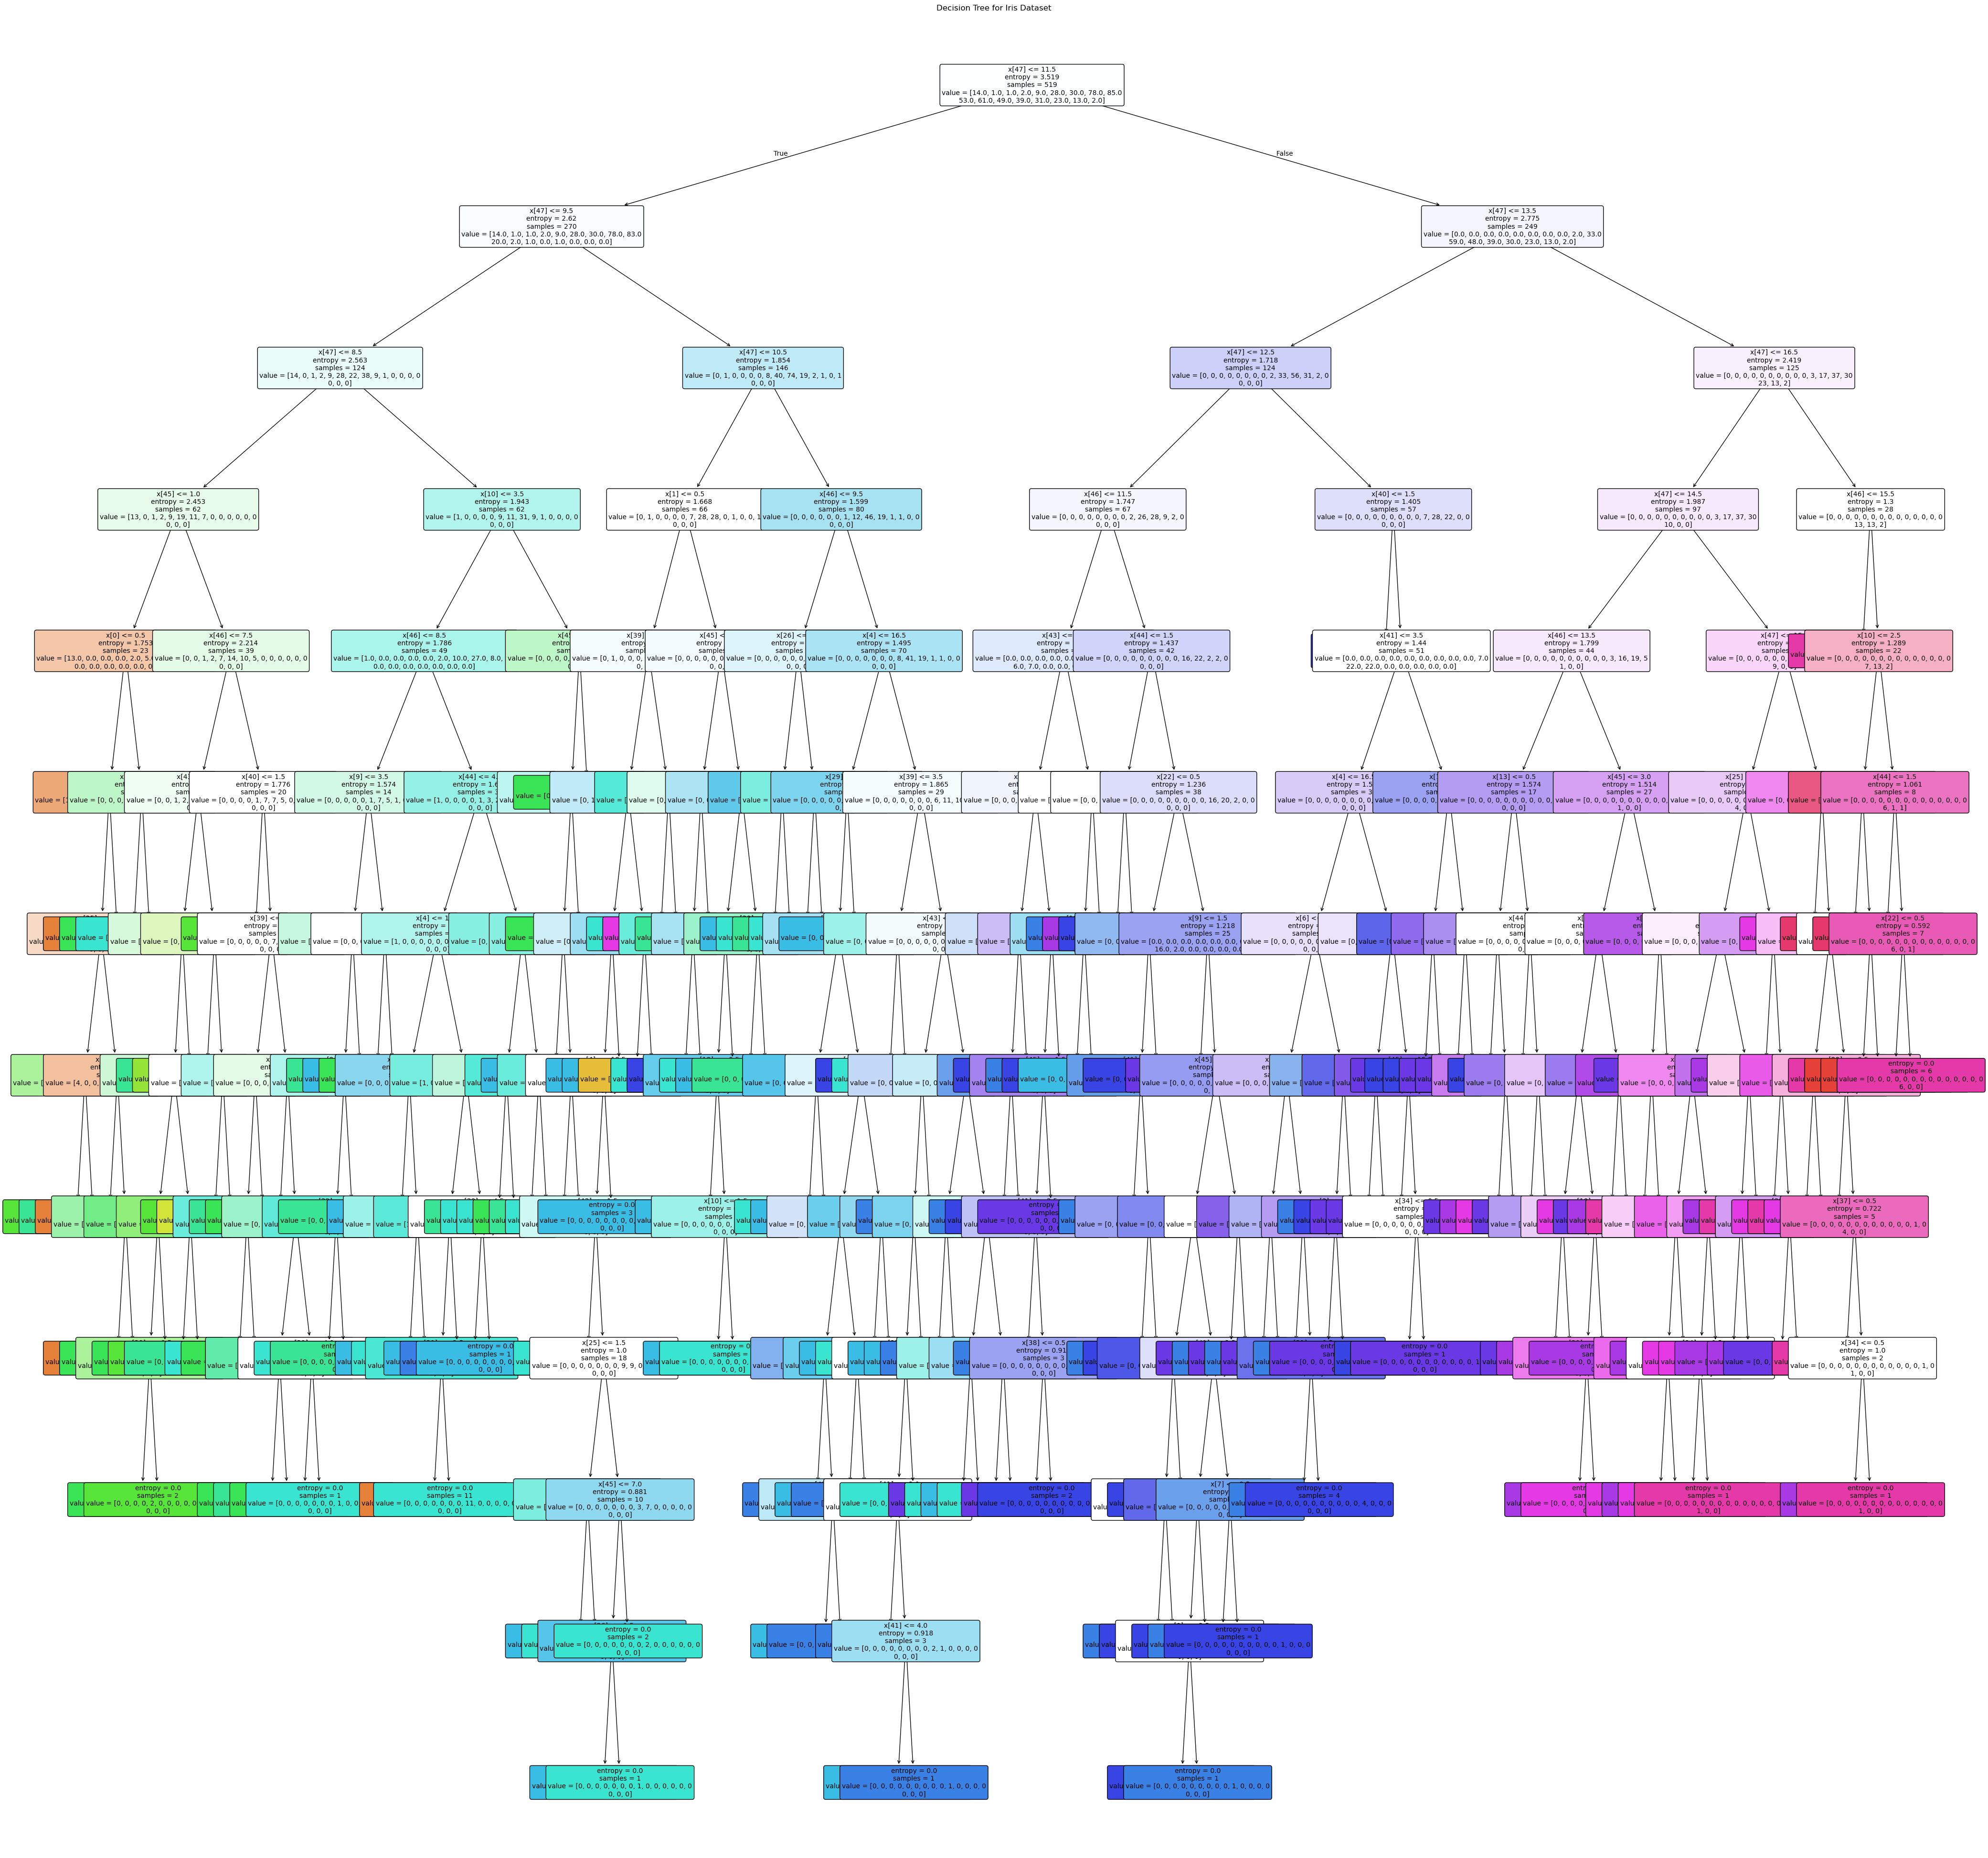

In [36]:
# 3.b
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(
    classifier,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Iris Dataset")
plt.show()